In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


# Data Science Challenge

In [2]:
# If additional packages are needed that are not installed by default, uncomment the last two lines of this 
# cell and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [2]:
import numpy as np

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [3]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [5]:
data.tail()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
8703,8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,19.0012,5.030438
8704,8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,16.9979,4.465908
8705,8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,19.9995,4.290459
8706,8707,2018-08-05 03:00:00,fall,No,No,Clear or partly cloudy,29.52,34.85,74.0,16.9979,3.713572
8707,8708,2018-08-05 04:00:00,fall,No,No,Clear or partly cloudy,29.52,34.85,74.0,16.9979,2.639057


In [6]:
data.shape

(8708, 11)

# **Lets perform some EDA analysis to get insights of data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   timestamp   8708 non-null   object 
 2   season      8708 non-null   object 
 3   holiday     8708 non-null   object 
 4   workingday  8708 non-null   object 
 5   weather     8708 non-null   object 
 6   temp        7506 non-null   float64
 7   temp_feel   8606 non-null   float64
 8   humidity    8669 non-null   float64
 9   windspeed   8508 non-null   float64
 10  demand      8708 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 748.5+ KB


In [8]:
data.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [9]:
data.tail()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
8703,8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,19.0012,5.030438
8704,8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,16.9979,4.465908
8705,8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.85,70.0,19.9995,4.290459
8706,8707,2018-08-05 03:00:00,fall,No,No,Clear or partly cloudy,29.52,34.85,74.0,16.9979,3.713572
8707,8708,2018-08-05 04:00:00,fall,No,No,Clear or partly cloudy,29.52,34.85,74.0,16.9979,2.639057


In [10]:
missing_value= data.isna().sum()
missing_value

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

# **We can see that there are lots of NaN values in data. lets replace these NaN Values with appropriate valuess**

**The given data include parameters like temperature, humidity and windspeed are highly dependent on seasons so lets replace the NaN values according to different seasons.**

In [11]:
data['season'].value_counts()

summer    2733
spring    2686
fall      1922
winter    1367
Name: season, dtype: int64

In [12]:
fall_data=data.loc[data['season']=='fall']
fall_temp=fall_data['temp']
fall_temp_mean=fall_temp.mean()
print(fall_temp_mean)
print(fall_temp)


29.22061151079136
2690    27.06
2691    27.06
2692    25.42
2693    26.24
2694    25.42
        ...  
8703    30.34
8704    30.34
8705    30.34
8706    29.52
8707    29.52
Name: temp, Length: 1922, dtype: float64


In [13]:
fall_temp=fall_temp.fillna(fall_temp_mean)
print(fall_temp.isna().sum())

0


In [14]:
summer_data=data.loc[data['season']=='summer']
summer_temp=summer_data['temp']
summer_temp_mean= summer_temp.mean()
print(summer_temp_mean)

print(summer_temp)


22.87512403763859
1323      NaN
1324    10.66
1325    10.66
1326     9.84
1327     9.84
        ...  
8146    32.80
8147    32.80
8148    31.16
8149      NaN
8150    29.52
Name: temp, Length: 2733, dtype: float64


In [15]:
summer_temp=summer_temp.fillna(summer_temp_mean)
print(summer_temp)
print(summer_temp.isna().sum())

1323    22.875124
1324    10.660000
1325    10.660000
1326     9.840000
1327     9.840000
          ...    
8146    32.800000
8147    32.800000
8148    31.160000
8149    22.875124
8150    29.520000
Name: temp, Length: 2733, dtype: float64
0


In [16]:
winter_data=data.loc[data['season']=='winter']
winter_temp=winter_data['temp']
winter_temp_mean=winter_temp.mean()
print(winter_temp_mean)
print(winter_temp)

16.540871794871823
4055    20.50
4056    19.68
4057    18.86
4058    18.86
4059    18.04
        ...  
5417    14.76
5418    16.40
5419    14.76
5420    14.76
5421    14.76
Name: temp, Length: 1367, dtype: float64


In [17]:
winter_temp=winter_temp.fillna(winter_temp_mean)

In [18]:
spring_data=data.loc[data['season']=='spring']
spring_temp=spring_data['temp']
spring_temp_mean=spring_temp.mean()
print(spring_temp_mean)
print(spring_temp)

12.53931330472101
0        9.84
1        9.02
2        9.02
3        9.84
4        9.84
        ...  
6780    25.42
6781    24.60
6782    24.60
6783    22.96
6784    22.96
Name: temp, Length: 2686, dtype: float64


In [19]:
spring_temp=spring_temp.fillna(spring_temp_mean)
print(spring_temp)

0        9.84
1        9.02
2        9.02
3        9.84
4        9.84
        ...  
6780    25.42
6781    24.60
6782    24.60
6783    22.96
6784    22.96
Name: temp, Length: 2686, dtype: float64


In [20]:
mean_value=data.groupby('season').mean()

In [21]:
print(mean_value)

                 id       temp  temp_feel   humidity  windspeed    demand
season                                                                   
fall    4838.530177  29.220612  33.149721  63.467295  11.566576  4.770098
spring  3423.521221  12.539313  15.208445  56.323364  14.649567  3.984206
summer  4736.750823  22.875124  26.670486  60.848841  13.401676  4.703267
winter  4739.000000  16.540872  20.095030  66.975073  11.290219  4.426184


In [22]:

for i in range(len(data.temp)):
  if pd.isna(data.temp[i])==True:
    data.temp[i]=mean_value.loc[data.season[i]]['temp']

<ipython-input-22-71e4dc8e563b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.temp[i]=mean_value.loc[data.season[i]]['temp']


In [23]:
for i in range(len(data.temp_feel)):
  if pd.isna(data.temp_feel[i])==True:
    data.temp_feel[i]=mean_value.loc[data.season[i]]['temp_feel']

<ipython-input-23-e310119c0945>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.temp_feel[i]=mean_value.loc[data.season[i]]['temp_feel']


In [24]:
for i in range(len(data.humidity)):
  if pd.isna(data.humidity[i])==True:
    data.humidity[i]=mean_value.loc[data.season[i]]['humidity']

<ipython-input-24-ec4dab7f76b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.humidity[i]=mean_value.loc[data.season[i]]['humidity']


In [25]:
for i in range(len(data.windspeed)):
  if pd.isna(data.windspeed[i])==True:
    data.windspeed[i]=mean_value.loc[data.season[i]]['windspeed']

<ipython-input-25-f75ccbf5b74b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.windspeed[i]=mean_value.loc[data.season[i]]['windspeed']


In [26]:
data.isna().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

**Finally we have zero NaN Values**

**Now as we do not have any missing values in data, we can now check for outliers. so lets plot few boxplots that will give us information about outliers**.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

<AxesSubplot:xlabel='windspeed', ylabel='demand'>

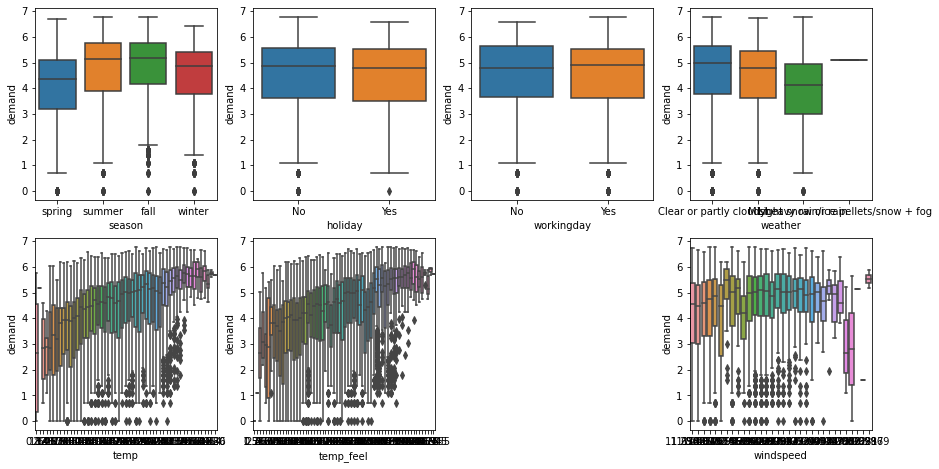

In [29]:

plt.figure(figsize=(15,12))
plt.subplot(3,4,1)
sns.boxplot(x=data['season'],y=data['demand'])
plt.subplot(3,4,2)
sns.boxplot(x=data['holiday'],y=data['demand'])
plt.subplot(3,4,3)
sns.boxplot(x=data['workingday'],y=data['demand'])
plt.subplot(3,4,4)
sns.boxplot(x=data['weather'],y=data['demand'])
plt.subplot(3,4,5)
sns.boxplot(x=data['temp'],y=data['demand'])
plt.subplot(3,4,6)
sns.boxplot(x=data['temp_feel'],y=data['demand'])
#plt.subplot(3,4,7)
#sns.boxplot(x=data['humidity'],y=data['demand'])
plt.subplot(3,4,8)
sns.boxplot(x=data['windspeed'],y=data['demand'])

# Removing of outliers
**Remove the outliers from data by selecting windspeed feature**

/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


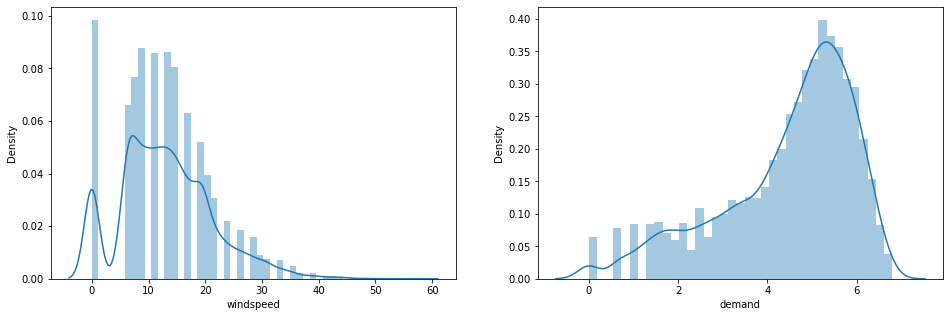

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['windspeed'])
plt.subplot(1,2,2)
sns.distplot(data['demand'])
plt.show()

/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

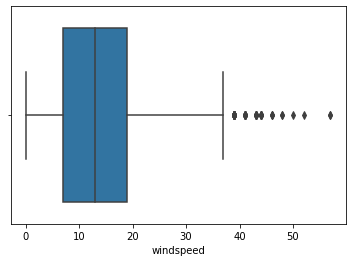

In [31]:
sns.boxplot(data['windspeed'])

In [32]:
percentile25 = data['windspeed'].quantile(0.25)
percentile75 = data['windspeed'].quantile(0.75)
iqr=percentile75-percentile25
print(iqr)

11.9997


In [33]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [34]:
data[data['windspeed'] > upper_limit]
data[data['windspeed'] < lower_limit]

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand


In [35]:
df=data[data['windspeed'] < upper_limit]
df.shape

(8648, 11)

/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fl

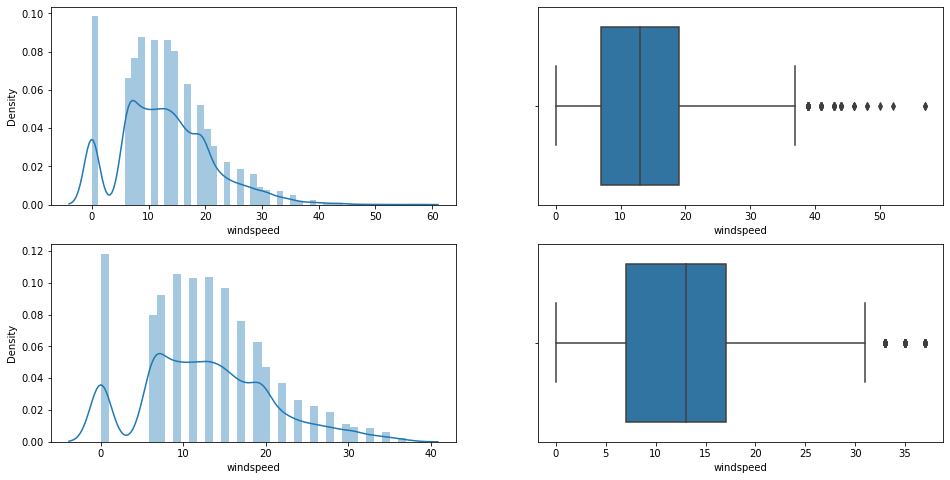

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['windspeed'])
plt.subplot(2,2,2)
sns.boxplot(data['windspeed'])
plt.subplot(2,2,3)
sns.distplot(df['windspeed'])
plt.subplot(2,2,4)
sns.boxplot(df['windspeed'])
plt.show()

We can see from above plot that initially we had many outliers in data but now outliers got reduced

# Finding correlation
Now our data is free of outliers we can now see how features are corelated to each others. 

In [37]:
data_corr=df.corr()
data_corr

,id,temp,temp_feel,humidity,windspeed,demand
id,1.000000,0.275912,0.287319,-0.054140,-0.066383,0.226754
temp,0.275912,1.000000,0.964019,-0.055384,-0.023598,0.373203
temp_feel,0.287319,0.964019,1.000000,-0.051235,-0.058714,0.389740
humidity,-0.054140,-0.055384,-0.051235,1.000000,-0.304326,-0.331957
windspeed,-0.066383,-0.023598,-0.058714,-0.304326,1.000000,0.123095
demand,0.226754,0.373203,0.389740,-0.331957,0.123095,1.000000


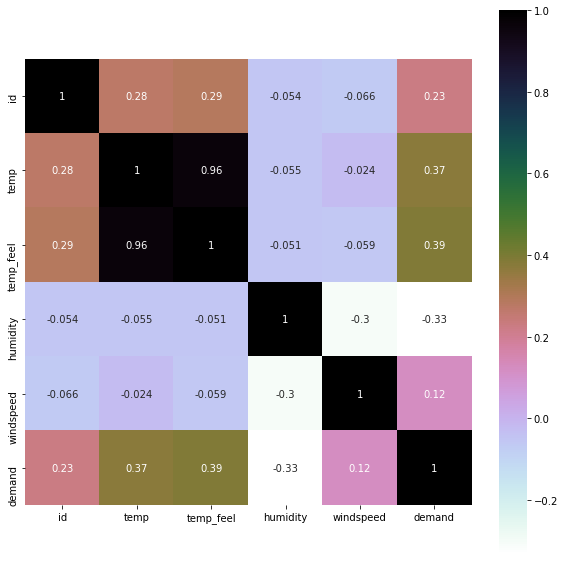

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [39]:
dataCorr=pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['demand'],columns=['Correlation to the target'])
dataCorr.style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))

,Correlation to the target
demand,1.000000
temp_feel,0.390950
temp,0.373886
id,0.227017
windspeed,0.117792
humidity,-0.330766


we can see that temperature, temp_feel and humidity are almost equally related with demand. The only difference is humidity has negative correlation with demand

# Adding features
We are almost done but this data has little information so we need to extract few more features fro timestamp feature

In [40]:
df['date'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d')
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['hour'] = pd.DatetimeIndex(df['timestamp']).hour
df['weekdays'] = pd.DatetimeIndex(df['timestamp']).weekday
# variable that will distinguish between night and day
df['label_day_night']=df['hour'].apply(lambda x : 0 if (x >20 or x<5) else( 1))
df['year']=df['year'].apply(lambda x : '0' if (x ==2017) else( '1'))
df

<ipython-input-40-276830f6d642>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['timestamp'],format='%Y-%m-%d')
<ipython-input-40-276830f6d642>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df['timestamp']).year
<ipython-input-40-276830f6d642>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,date,year,hour,weekdays,label_day_night
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0000,2.772589,2017-01-01 00:00:00,0,0,6,0
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.688879,2017-01-01 01:00:00,0,1,6,0
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0000,3.465736,2017-01-01 02:00:00,0,2,6,0
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,2.564949,2017-01-01 03:00:00,0,3,6,0
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0000,0.000000,2017-01-01 04:00:00,0,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,8704,2018-08-05 00:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.0012,5.030438,2018-08-05 00:00:00,1,0,6,0
8704,8705,2018-08-05 01:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,16.9979,4.465908,2018-08-05 01:00:00,1,1,6,0
8705,8706,2018-08-05 02:00:00,fall,No,No,Clear or partly cloudy,30.34,34.850,70.0,19.9995,4.290459,2018-08-05 02:00:00,1,2,6,0
8706,8707,2018-08-05 03:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979,3.713572,2018-08-05 03:00:00,1,3,6,0


now we haeve 15+ features in data. we are almost ready for modeling now

# Label Encoding
We have now data that can be used in different model to find better accuracy, however there are few features in data that are categorical. We  have to change that categorical data into numeric value by using different label encoding

In [41]:
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [42]:
df['workingday']=df['workingday'].apply(lambda x : 1 if (x =='Yes') else(0))
df['holiday']=df['holiday'].apply(lambda x : 1 if (x =='Yes') else(0))
df['season']=df['season'].replace(['fall'],1)
df['season']=df['season'].replace(['summer'],1)
#encoder = OneHotEncoder(sparse=False)
# transform data
#onehot = encoder.fit_transform(data['weather'])
df['season']=df['season'].replace(['spring'],2)#df['season']=df['season'].replace(['summer'],3)
df['season']=df['season'].replace(['winter'],4)
df['weather']=df['weekdays'].replace(['Clear or partly cloudy'],1)
df['weather']=df['weekdays'].replace(['Mist'],2)
df['weather']=df['weekdays'].replace(['Light snow or rain'],3)
df['weather']=df['weekdays'].replace(['heavy rain/ice pellets/snow + fog'],4)



<ipython-input-42-25149d83ac0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workingday']=df['workingday'].apply(lambda x : 1 if (x =='Yes') else(0))
<ipython-input-42-25149d83ac0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['holiday']=df['holiday'].apply(lambda x : 1 if (x =='Yes') else(0))
<ipython-input-42-25149d83ac0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [43]:
df

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,date,year,hour,weekdays,label_day_night
0,1,2017-01-01 00:00:00,2,0,0,6,9.84,14.395,81.0,0.0000,2.772589,2017-01-01 00:00:00,0,0,6,0
1,2,2017-01-01 01:00:00,2,0,0,6,9.02,13.635,80.0,0.0000,3.688879,2017-01-01 01:00:00,0,1,6,0
2,3,2017-01-01 02:00:00,2,0,0,6,9.02,13.635,80.0,0.0000,3.465736,2017-01-01 02:00:00,0,2,6,0
3,4,2017-01-01 03:00:00,2,0,0,6,9.84,14.395,75.0,0.0000,2.564949,2017-01-01 03:00:00,0,3,6,0
4,5,2017-01-01 04:00:00,2,0,0,6,9.84,14.395,75.0,0.0000,0.000000,2017-01-01 04:00:00,0,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,8704,2018-08-05 00:00:00,1,0,0,6,30.34,34.850,70.0,19.0012,5.030438,2018-08-05 00:00:00,1,0,6,0
8704,8705,2018-08-05 01:00:00,1,0,0,6,30.34,34.850,70.0,16.9979,4.465908,2018-08-05 01:00:00,1,1,6,0
8705,8706,2018-08-05 02:00:00,1,0,0,6,30.34,34.850,70.0,19.9995,4.290459,2018-08-05 02:00:00,1,2,6,0
8706,8707,2018-08-05 03:00:00,1,0,0,6,29.52,34.850,74.0,16.9979,3.713572,2018-08-05 03:00:00,1,3,6,0


In [44]:
df_corr=df.corr()
df_corr

,id,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand,hour,weekdays,label_day_night
id,1.000000,-0.040092,0.004158,0.001538,-0.004449,0.275912,0.287319,-0.054140,-0.066383,0.226754,-0.006367,-0.004449,-0.007184
season,-0.040092,1.000000,0.019700,-0.018311,0.015769,-0.486318,-0.455678,0.067569,-0.040368,-0.098831,0.001574,0.015769,0.001808
holiday,0.004158,0.019700,1.000000,-0.247418,-0.101960,-0.007815,-0.015099,-0.025174,0.015210,-0.000950,-0.000831,-0.101960,0.001355
workingday,0.001538,-0.018311,-0.247418,1.000000,-0.175691,0.026022,0.031648,0.008520,0.005965,-0.019647,0.004580,-0.175691,0.005082
weather,-0.004449,0.015769,-0.101960,-0.175691,1.000000,-0.025411,-0.023689,-0.040667,-0.020899,0.031570,-0.003187,1.000000,-0.003965
temp,0.275912,-0.486318,-0.007815,0.026022,-0.025411,1.000000,0.964019,-0.055384,-0.023598,0.373203,0.125191,-0.025411,0.093505
temp_feel,0.287319,-0.455678,-0.015099,0.031648,-0.023689,0.964019,1.000000,-0.051235,-0.058714,0.389740,0.138790,-0.023689,0.094170
humidity,-0.054140,0.067569,-0.025174,0.008520,-0.040667,-0.055384,-0.051235,1.000000,-0.304326,-0.331957,-0.277619,-0.040667,-0.228547
windspeed,-0.066383,-0.040368,0.015210,0.005965,-0.020899,-0.023598,-0.058714,-0.304326,1.000000,0.123095,0.147257,-0.020899,0.161741
demand,0.226754,-0.098831,-0.000950,-0.019647,0.031570,0.373203,0.389740,-0.331957,0.123095,1.000000,0.568427,0.031570,0.554084


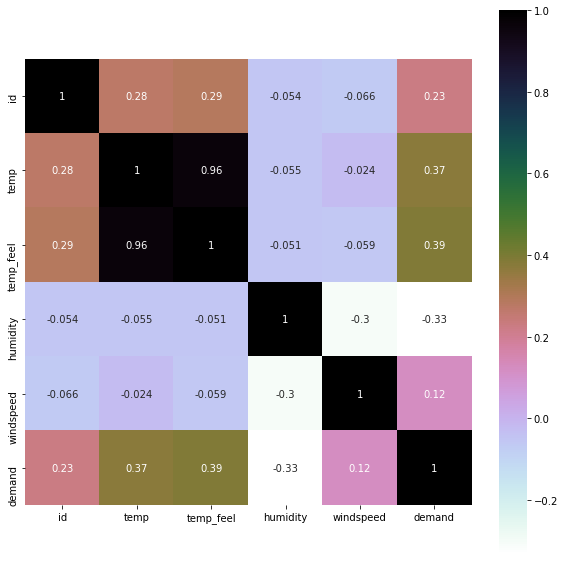

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

Now we have all the required data in numeric form, We can now implement different modeling technique to determine better accuracy. But before that lets see if adding these extra features has any impact on data or not by takingcorrelation of data again

## Visualization, Modeling, Machine Learning

Build a model that can predict hourly demand and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of mean absolute error.**
- **Read the test.csv file and prepare features for testing.**

In [48]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


<AxesSubplot:xlabel='date'>

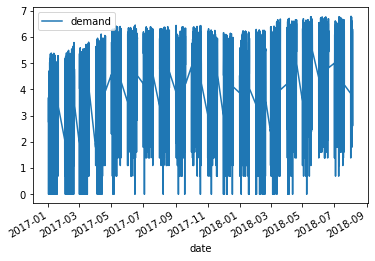

In [49]:
df.plot(x='date',y='demand',kind='line')


Now lets use different modeling to find the better accuracy

# Linear Modeling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso 
from sklearn.ensemble import RandomForestRegressor
  

In [51]:
df.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand', 'date', 'year', 'hour',
       'weekdays', 'label_day_night'],
      dtype='object')

In [52]:
reporting={}
X_LinearRegression=df.drop(['timestamp','date','demand','year'],axis =1)
y=df.iloc[:,-6]
X_train,X_test,y_train,y_test=train_test_split(X_LinearRegression,y,test_size=0.27)

In [53]:
X_train.isna().sum()

id                 0
season             0
holiday            0
workingday         0
weather            0
temp               0
temp_feel          0
humidity           0
windspeed          0
hour               0
weekdays           0
label_day_night    0
dtype: int64

In [54]:
X_test.isna().sum()

id                 0
season             0
holiday            0
workingday         0
weather            0
temp               0
temp_feel          0
humidity           0
windspeed          0
hour               0
weekdays           0
label_day_night    0
dtype: int64

In [55]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [56]:
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

Linear model intercept: 1.4071930601867573 and the coefficients are: [ 9.21022884e-05  3.66330473e-02 -2.86304765e-02 -6.28952072e-02
  1.32214427e-02  3.13106636e-03  3.97970683e-02 -6.98652869e-03
 -2.10551047e-03  9.21251370e-02  1.32214427e-02  1.40267746e+00]


In [57]:
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {}'.format(train_set_r2))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {}'.format(test_set_r2))

Linear model, R2 train score is : 0.6412140289167132
Linear model, R2 test score is : 0.6437923316797063


with linear modeling we got accuracy of almost 65% which is not that good as we want little better accuracy, so lets try another model called xgboost

---



# xgboost technique

In [58]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
X, y = df.drop(['timestamp','date','demand','year'],axis =1),df.iloc[:,-6]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [73]:
model = XGBClassifier()
model.fit(X_train, y_train)

/Users/musubimanagement/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_pred = model.predict(X_test)

#predictions = [round(value) for value in y_pred]

In [63]:
#y_pred_train=model.predict(X_train)

In [75]:
#test_set_r2 = r2_score(y_train, y_pred_train)
#print('xgboost model, R2 train score is : {}'.format(test_set_r2))
test_set_r2 = r2_score(y_test, y_pred)
print('xgboost model, R2 test score is : {}'.format(test_set_r2))

xgboost model, R2 test score is : 0.7779518832740522


Here as we expected we got way better accuracy score in xgboost as compared to linear model. Now lets check wheather any other model gives a better accuracy than xgboost

# Random Forest method

In [76]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [77]:
regressor.fit(X, y) 

RandomForestRegressor(random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [80]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.23098055111288682
Mean Squared Error: 0.12492790154922033
Root Mean Squared Error: 0.35345141327942137


In [81]:
#test_set_r2 = r2_score(y_train, y_pred_train)
#print('xgboost model, R2 train score is : {}'.format(test_set_r2))
test_set_r2 = r2_score(y_test, y_pred)
print('random forest  model, R2 test score is : {}'.format(test_set_r2))

random forest  model, R2 test score is : 0.9410297346327937


Finally we have the winner. It is Random Forest method that gave us the best accuracy score of 94%. Hence we can use random forest learning technique to predict the demand of bike rented per hour with respect to different features



**Identify the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `demand` variable. Submit a CSV file with a header row and one row per test entry.
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **demand**

In [91]:
submission=y_pred

In [104]:
submission_df=pd.DataFrame(submission)
submission_df

,0
0,4.119733
1,1.384736
2,5.848238
3,0.765745
4,5.902047
...,...
1725,4.035346
1726,3.745663
1727,6.090204
1728,5.653151


In [96]:
id=test_data.id[0:1730]
id

0        8709
1        8710
2        8712
3        8713
4        8714
        ...  
1725    10810
1726    10811
1727    10812
1728    10813
1729    10815
Name: id, Length: 1730, dtype: int64

In [97]:
submission_df['id']=id

In [110]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

submission_df

,prediction
0,4.119733
1,1.384736
2,5.848238
3,0.765745
4,5.902047
...,...
1725,4.035346
1726,3.745663
1727,6.090204
1728,5.653151


In [112]:
submission_df['id']=id
submission_df

,prediction,id
0,4.119733,8709
1,1.384736,8710
2,5.848238,8712
3,0.765745,8713
4,5.902047,8714
...,...,...
1725,4.035346,10810
1726,3.745663,10811
1727,6.090204,10812
1728,5.653151,10813


---

In [167]:
conda install -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/musubimanagement/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    conda-4.10.3               |   py38h50d1736_2         3.1 MB  conda-forge
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    xgboost-1.3.3              |   py38hecd8cb5_0          23 KB
    ------------------------------------------------------------
                            